In [2]:
import numpy as np
from sklearn.preprocessing import normalize
import cv2
from stereo_functions import get_fundamental_mat, get_sift_matches,\
                             drawlines, draw_epilines
import matplotlib.pyplot as plt

In [7]:
print('loading images...')
i = 4
imgL = cv2.imread(f'data/{i}_a.jpg')
imgR = cv2.imread(f'data/{i}_b.jpg')

loading images...


In [8]:
imsize = imgL.shape[1], imgL.shape[0]
pts1, pts2, _ = get_sift_matches(imgL, imgR)
F, pts1_inliers, pts2_inliers = get_fundamental_mat(pts1, pts2)

pts1_draw = pts1_inliers[:4]
pts2_draw = pts2_inliers[:4]
left_epi, right_epi = draw_epilines(imgL, imgR, pts1_draw, pts2_draw, F)


retval, H1, H2 = cv2.stereoRectifyUncalibrated(np.array(pts1),
                                               np.array(pts2),
                                               F, imsize)
print(retval)

True


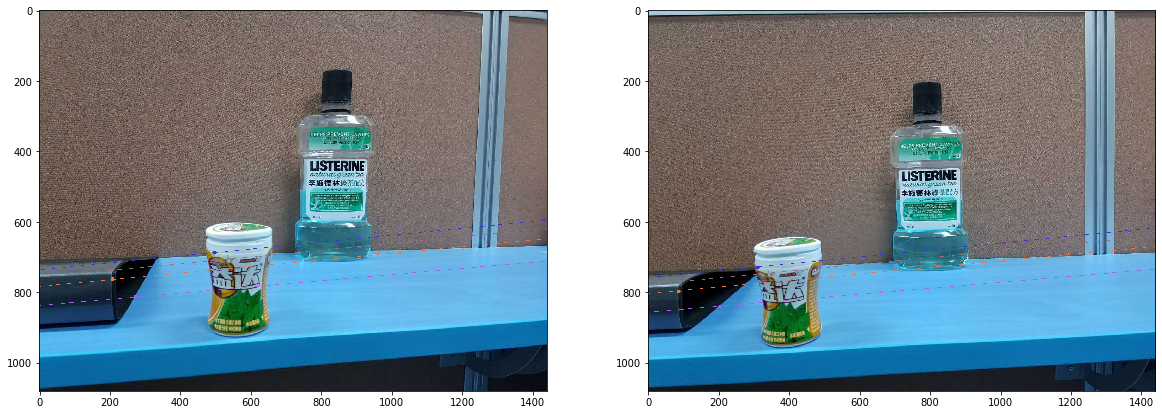

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(left_epi)
plt.subplot(122)
plt.imshow(right_epi)

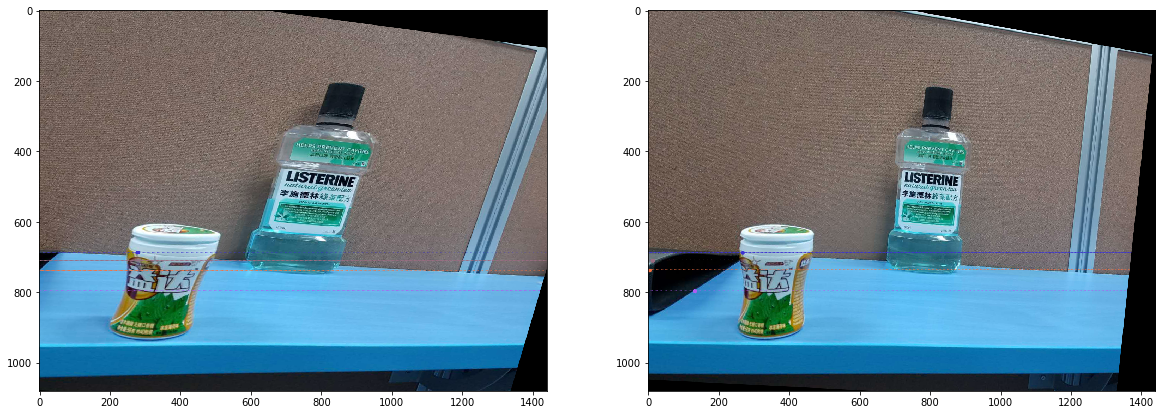

In [10]:
left_epi = cv2.warpPerspective(left_epi, H1, imsize)
right_epi = cv2.warpPerspective(right_epi, H2, imsize)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(left_epi)
plt.subplot(122)
plt.imshow(right_epi)

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import cv2
from stereo_functions import get_disp_map, get_rectified_stereo
import os
import matplotlib.pyplot as plt

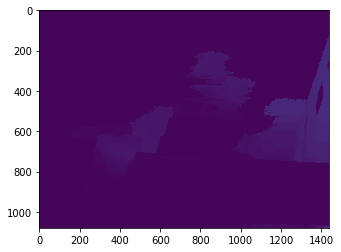

In [50]:

i  = 4
im_left = cv2.imread(f'data/{i}_a.jpg')
im_right = cv2.imread(f'data/{i}_b.jpg')
im_left, im_right = get_rectified_stereo(im_left, im_right)
displ, dispr = get_disp_map(im_left, im_right, 96, 'bm', True)
plt.imshow(displ)

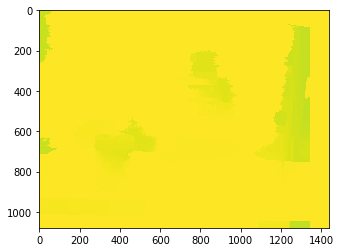

In [51]:
plt.imshow(dispr)

In [59]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

i = 4
points = pd.read_csv(f'results/points/{i}_a.txt', header=None)
points = points.to_numpy()

def draw_points_and_line(pts, img):
    color = tuple(np.random.randint(0,255,3).tolist())
    assert len(pts) == 2
    img = cv2.circle(img, tuple(pts[0].tolist()), 5, color, -1)
    img = cv2.circle(img, tuple(pts[1].tolist()), 5, color, -1)
    img = img1 = cv2.line(img,
                          tuple(pts[0].tolist()), 
                          tuple(pts[1].tolist()),
                          color,3)
    return img

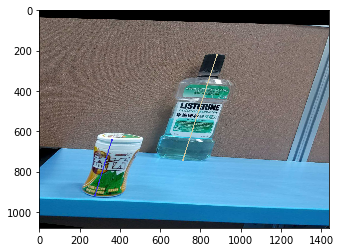

In [60]:
img =  cv2.imread(f'results/rectified/{i}_a_rect.jpg')

img = draw_points_and_line(points[:2], img)
img = draw_points_and_line(points[2:4], img)

plt.imshow(img)

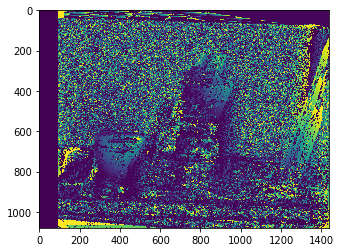

In [61]:
disp = cv2.imread(f'results/normalized_disparity_map/{i}_a_disp.jpg', 0)
plt.imshow(disp)

In [62]:
from scipy import stats

def reject_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def cal_normalized_distance(disp_map, pt1, pt2):
    disps = []
    for y in range(pt1[1], pt2[1]):
        x = pt1[0] + ((y - pt1[1]) / (pt2[1] - pt1[1])) * (pt2[0] - pt1[0])
        x = int(x)
        disps.append(disp_map[y, x])
#     disp = stats.mode(disps)[0][0]
#     disp = np.median(disps)
#     print(disp)
    disps = reject_outliers(np.array(disps))
    min_disp = np.min(disps)
    max_disp = np.max(disps)
    disp_range = np.max(disps) - min_disp
#     print(np.min(disps), np.max(disps))
    # in this case we don't trust the mean disprity
    if disp_range / (min_disp + 1e-3) > 5 or max_disp < 5:
        disp = np.max(disps)
    else:
        disp = np.mean(disps)
#     print(disp)
    dist = np.linalg.norm(pt2 - pt1)
#     print(dist)
    return dist / disp

In [63]:
dist1 = cal_normalized_distance(disp, points[0], points[1])
dist2 = cal_normalized_distance(disp, points[2], points[3])

print(dist1, dist2)

2.1213203435596424 2.6439204363347697
